In [ ]:
import torch
import torchvision
import torch.nn as nn
import torch.nn.functional as F
import matplotlib.pyplot as plt
import torchvision.transforms as transforms
import time

# trainset = torchvision.datasets.CIFAR10(root='./data', train =True,download=True)
# testset = torchvision.datasets.CIFAR10(root='./data', train=False,download=True)

### 定义超参数

In [ ]:
TRAIN_BATCH_SIZE = 500
TEST_BATCH_SIZE = 100
EPOCH = 150

# 定义训练的设备
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

### torchvision模块载入CIFAR10数据集，并且通过transform归一化到[0,1]

In [ ]:
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5,0.5,0.5),(0.5,0.5,0.5))])
trainset = torchvision.datasets.CIFAR10(root='./data',train = True, download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset,batch_size = TRAIN_BATCH_SIZE, shuffle = True, num_workers=2)

testset = torchvision.datasets.CIFAR10(root='./data',train = False, download=False, transform=transform)
testloader = torch.utils.data.DataLoader(testset,batch_size = TEST_BATCH_SIZE, shuffle = False, num_workers=2)
classes = ('plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck') 

  0%|          | 0/170498071 [00:00<?, ?it/s]

Extracting ./data/cifar-10-python.tar.gz to ./data


### 定义卷积神经网络

In [ ]:
class CNN(nn.Module):
  def __init__(self):
    super(CNN,self).__init__()
    self.conv1 = torch.nn.Conv2d(in_channels = 3,
                    out_channels = 6,
                    kernel_size = 5,
                    stride = 1,
                    padding = 0)
    self.pool = torch.nn.MaxPool2d(kernel_size = 2,
                    stride = 2)
    self.conv2 = torch.nn.Conv2d(6,16,5)
    self.fc1 = torch.nn.Linear(16*5*5,120)
    self.fc2 = torch.nn.Linear(120,84)
    self.fc3 = torch.nn.Linear(84,10)
      
  def forward(self,x):
    x = self.pool(F.relu(self.conv1(x)))
    x = self.pool(F.relu(self.conv2(x)))

    x = x.view(-1, 16 * 5 * 5) # 将数据平整为一维的
    x = F.relu(self.fc1(x))
    x = F.relu(self.fc2(x))
    x = self.fc3(x)
    return x
 
net = CNN()
net = net.to(device) # 在 GPU 上进行训练

### 损失函数和优化器

In [ ]:
import torch.optim as optim

optimizer = optim.SGD(net.parameters(),lr=0.001,momentum=0.9)
loss_func = torch.nn.CrossEntropyLoss() # 预测值和真实值的误差计算公式 (交叉熵)
loss_func = loss_func.to(device) # 在 GPU 上进行训练

### CNN训练


In [ ]:
start_time = time.time() # 开始训练的时间
accuracy_list = []
for epoch in range(EPOCH):
  for step, (b_x,b_y)in enumerate(trainloader):
    b_x = b_x.to(device)
    b_y = b_y.to(device)
    outputs = net(b_x) # 喂给 net 训练数据 x, 输出预测值
    loss = loss_func(outputs, b_y) # 计算两者的误差
    optimizer.zero_grad() # 清空上一步的残余更新参数值
    loss.backward() # 误差反向传播, 计算参数更新值
    optimizer.step() # 将参数更新值施加到 net 的 parameters 上
    step += 1
    # 打印状态信息
    if step % 100 == 0:    # 每100批次打印一次
      end_time = time.time()  # 训练结束时间
      print("训练时间: {}".format(end_time - start_time))
      print("Loss: {}".format(loss))

  total_test_loss = 0
  total_accuracy = 0
  test_data_size = 0
  with torch.no_grad():
    #不计算梯度，节省时间
    for (images,labels) in testloader:
      images = images.to(device)
      labels = labels.to(device)
      outputs = net(images)
      loss = loss_func(outputs, labels)
      total_test_loss += loss
      test_data_size += labels.size(0)
      numbers,predicted = torch.max(outputs.data,1)
      total_accuracy+=(predicted==labels).sum().item()   # 相加

  print("整体测试集上的loss: {}".format(total_test_loss))
  print("整体测试集上的正确率: {}".format(total_accuracy / test_data_size))
  accuracy_list.append(total_accuracy / test_data_size)
  total_test_loss += 1   

print('Finished Training')
print("训练{}次后的正确率为{}".format(EPOCH, accuracy_list[-1]))

训练时间: 9.498002529144287
Loss: 1.6556062698364258
整体测试集上的loss: 171.68589782714844
整体测试集上的正确率: 0.3617
训练时间: 21.441858053207397
Loss: 1.6705223321914673
整体测试集上的loss: 170.03085327148438
整体测试集上的正确率: 0.3687
训练时间: 33.327187299728394
Loss: 1.7108954191207886
整体测试集上的loss: 168.5367889404297
整体测试集上的正确率: 0.3748
训练时间: 45.390188694000244
Loss: 1.6785751581192017
整体测试集上的loss: 166.58895874023438
整体测试集上的正确率: 0.3849
训练时间: 58.30101203918457
Loss: 1.5828828811645508
整体测试集上的loss: 165.1055450439453
整体测试集上的正确率: 0.3902
训练时间: 70.14714455604553
Loss: 1.6815803050994873
整体测试集上的loss: 163.6831817626953
整体测试集上的正确率: 0.3996
训练时间: 82.0458984375
Loss: 1.6061947345733643
整体测试集上的loss: 162.18800354003906
整体测试集上的正确率: 0.4064
训练时间: 94.05230212211609
Loss: 1.568587064743042
整体测试集上的loss: 161.55712890625
整体测试集上的正确率: 0.4114
训练时间: 105.92238855361938
Loss: 1.6133471727371216
整体测试集上的loss: 159.7872772216797
整体测试集上的正确率: 0.4193
训练时间: 117.86527037620544
Loss: 1.5896023511886597
整体测试集上的loss: 159.17308044433594
整体测试集上的正确率: 0.4221
训练时间: 1

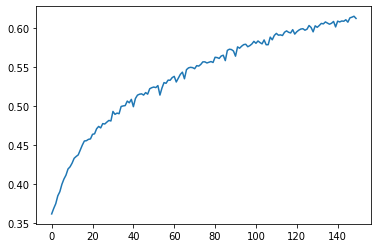

In [ ]:
plt.figure()
plt.plot(accuracy_list)
plt.show()